In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import os

# In[50]:

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras import models
from PIL import Image

In [6]:
import os
path = "./ios/"

#获取该目录下所有文件，存入列表中
fileList=os.listdir(path)

n=0
for i in fileList:
    
    #设置旧文件名（就是路径+文件名）
    oldname=path+ os.sep + fileList[n]   # os.sep添加系统分隔符

    #设置新文件名
    newname= oldname.replace("@","_")
    
    os.rename(oldname,newname)   #用os模块中的rename方法对文件改名
    print(oldname,'======>',newname)
    
    n+=1


./ios//selectorangeline_icon@2x.png ======> ./ios//selectorangeline_icon_2x.png
./ios//previous_icon@2x.png ======> ./ios//previous_icon_2x.png
./ios//sleep_icon@3x.png ======> ./ios//sleep_icon_3x.png
./ios//moonbig_icon@3x.png ======> ./ios//moonbig_icon_3x.png
./ios//bikingman_icon@3x.png ======> ./ios//bikingman_icon_3x.png
./ios//calories_icon@3x.png ======> ./ios//calories_icon_3x.png
./ios//menuwhitewithgreyshape@2x.png ======> ./ios//menuwhitewithgreyshape_2x.png
./ios//line_icon@3x.png ======> ./ios//line_icon_3x.png
./ios//scanningflash_icon@3x.png ======> ./ios//scanningflash_icon_3x.png
./ios//Facebook_icons@2x.png ======> ./ios//Facebook_icons_2x.png
./ios//password_icon@2x.png ======> ./ios//password_icon_2x.png
./ios//whatsapp_icons@3x.png ======> ./ios//whatsapp_icons_3x.png
./ios//purple_background@2x.png ======> ./ios//purple_background_2x.png
./ios//bedroomwhite_icon@3x.png ======> ./ios//bedroomwhite_icon_3x.png
./ios//twitter_icons@2x.png ======> ./ios//twitter_ico

In [2]:
# 获取 数据目录
# 数据集用 https://www.kaggle.com/moltean/fruits/data 
data_root_orig = "/root/quan/fruits-360/Training/"
data_root = pathlib.Path(data_root_orig)
label_name = sorted(item.name for item in data_root.glob('*/')
                    if item.is_dir())
# label 名称 
label_name

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Dates',
 'Eggplant',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango',
 'Mango Red',
 'Mangostan',
 'Maracuja',
 'Melon

In [3]:

# the tfrecord file path, you need to create the folder yourself
# 生成tf record 目录
import os
recordPath = "./"
if not os.path.exists(recordPath):
    os.makedirs(recordPath)

# the number of classes of images

# 组装 label名称和标签名称 例如 {“name”：1}
values = [i for i in list(range(len(label_name)))]
classes = dict(zip(values, label_name ))
classes

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Dates',
 36: 'Eggplant',
 37: 'Ginger Root',
 38: 'Granadilla',
 39: 'Grape Blue',
 40: 'Grape Pink',
 41: 'Grape White',
 42: 'Grape White 2',
 43: 'Grape White 3',
 44: 'Grape White 4',
 45: 'Grapefruit Pink',
 46: 'Grapefruit White',
 47: 'Guava',
 48: 'Haze

In [7]:
# 创建数据格式
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))



def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def image_example(image_string, label_name):
      image_shape = tf.image.decode_jpeg(image_string).shape
      #print(image_shape, "-----")
      feature = {
            'height': _int64_feature(image_shape[0]),
          'width': _int64_feature(image_shape[1]),
          'depth': _int64_feature(image_shape[2]), 

          'image_raw': _bytes_feature(image_string),
          'label': _int64_feature(label_name),
      }
      return tf.train.Example(features=tf.train.Features(feature=feature))
def lable_exmap(label_name):
      print(image_shape, "-----")
      feature = {
          'label': _bytes_feature(label_name),
         
      }
      return tf.train.Example(features=tf.train.Features(feature=feature))    

In [8]:
#写入文件 
for name, label in classes.items():
    class_path = os.path.join(data_root_orig, label)
    tf_file_name = "/root/quan/fruits-360/tfrecord/train.tfrecord-%.3d" % name
    with tf.io.TFRecordWriter(tf_file_name) as writer:
        for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                img = open(img_path, 'rb').read()
#                 img_tensor = tf.image.decode_jpeg(img, channels=3)
#                 img_tensor = tf.image.convert_image_dtype(
#                         img_tensor, tf.float32, saturate=False, name=None
#                     )
#                 print(img_tensor, img)
#                 img_tensor = (img_tensor/127.5) - 1
#                 tf_fianl = tf.image.resize(img_tensor, [100, 100])

#                 img_tensor = tf.image.decode_jpeg(img,channels=3)
#                 img_input = img_tensor.numpy()
                #imgs = tf.image.resize(img_tensor, [10,10])
                #img = tf.image.convert_image_dtype(img_tensor, tf.float32)
                example = image_example(img, label_name=name)
                #example_lable = label_exmap(name)
                writer.write(example.SerializeToString())
                #tf.io.TFRecordWriter(tf_file_name)
                
                #example_lable = label_exmap(example_lable)


In [32]:
# 文件类别
image_feature_description = {

    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}
# 提供组装 数据方法
def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

In [108]:
# 加载tfrecord 文件 
os.chdir("/root/quan/fruits-360/tfrecord/tfrecord/")
print(os.getcwd())
name_list = [k for _, _ , k in os.walk(".")]
print(name_list[0])
dataset = tf.data.TFRecordDataset(filenames = [name_list[0]])
dataset

/root/quan/fruits-360/tfrecord/tfrecord
['train.tfrecord-091', 'train.tfrecord-083', 'train.tfrecord-067', 'train.tfrecord-026', 'train.tfrecord-058', 'train.tfrecord-016', 'train.tfrecord-109', 'train.tfrecord-003', 'train.tfrecord-111', 'train.tfrecord-056', 'train.tfrecord-114', 'train.tfrecord-012', 'train.tfrecord-046', 'train.tfrecord-119', 'train.tfrecord-037', 'train.tfrecord-066', 'train.tfrecord-039', 'train.tfrecord-081', 'train.tfrecord-075', 'train.tfrecord-106', 'train.tfrecord-117', 'train.tfrecord-110', 'train.tfrecord-076', 'train.tfrecord-034', 'train.tfrecord-018', 'train.tfrecord-055', 'train.tfrecord-059', 'train.tfrecord-017', 'train.tfrecord-000', 'train.tfrecord-080', 'train.tfrecord-112', 'train.tfrecord-022', 'train.tfrecord-072', 'train.tfrecord-021', 'train.tfrecord-100', 'train.tfrecord-097', 'train.tfrecord-108', 'train.tfrecord-040', 'train.tfrecord-053', 'train.tfrecord-062', 'train.tfrecord-029', 'train.tfrecord-019', 'train.tfrecord-050', 'train.tfreco

<TFRecordDatasetV2 shapes: (), types: tf.string>

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00d\x00d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x9

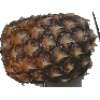

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00d\x00d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x9

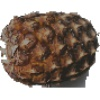

2


In [163]:
from IPython import display
parsed_image_dataset = dataset.map(_parse_image_function)
sum = 0
for image_feature in parsed_image_dataset.take(2):
    #print(image_feature)
    sum+=1
    img_raw = image_feature['image_raw'].numpy()
    print(img_raw)
#     label = image_feature['label'].numpy()
#     print(label)
    display.display(display.Image(data=img_raw))
print(sum)

In [165]:
datas =  parsed_image_dataset.shuffle(buffer_size=4).batch(1)
sum  = 0
for image_feature in datas.take(1):
    #print(image_feature)
    sum +=1
    img_raw = image_feature['image_raw'].numpy()
#     img_tensor = tf.image.decode_jpeg(img_raw, channels=3)
#     img_tensor = tf.image.convert_image_dtype(
#             img_tensor, tf.float32, saturate=False, name=None
#         )
    
    dadfta = tf.image.decode_jpeg(img_raw)
    print(dadfta.shape)
    
    #print(tf.image.convert_image_dtype(dadfta, tf.float32)) 

    #print(img_tensor, img)
    #img_tensor = (img_tensor/127.5) - 1
#     print("dfjkdjf %s " % image_da, "\n")
#     tf_fianl = tf.image.resize(img_tensor, [100, 100])
#     print(img_raw)
#     label = image_feature['label'].numpy()
#     print(label)

print(sum)

InvalidArgumentError: contents must be scalar, got shape [1] [Op:DecodeJpeg]

In [161]:
def input_fn(dataset):
    #ist_ds = tf.data.Dataset.from_tensor_slices(dataset)
   
    return dataset.shuffle(buffer_size=100).batch(10)


In [162]:
ds = input_fn(parsed_image_dataset)
for i in ds.take(1):
    
    print(i)

{'image_raw': <tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00d\x00d\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuv